In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('./test_images/messitest1.jpg')
img.shape

(345, 615, 3)

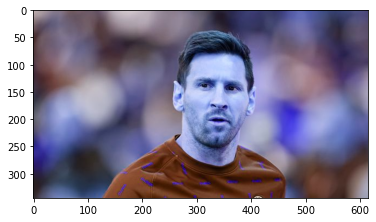

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(345, 615)

In [6]:
gray

array([[176, 176, 176, ...,  87,  85,  84],
       [175, 175, 174, ...,  87,  85,  84],
       [174, 173, 173, ...,  87,  86,  85],
       ...,
       [ 43,  44,  45, ..., 168, 167, 166],
       [ 43,  44,  46, ..., 167, 167, 166],
       [ 44,  45,  47, ..., 166, 166, 166]], dtype=uint8)

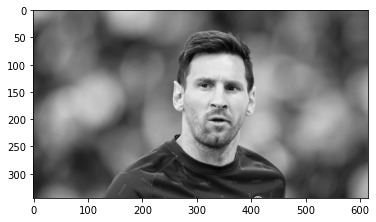

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[264,  78, 155, 155]])

In [9]:
(x,y,w,h) =faces[0]
x,y,w,h

(264, 78, 155, 155)

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
faces

array([[264,  78, 155, 155]])

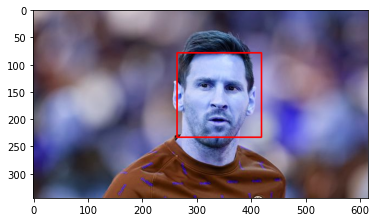

In [11]:
plt.imshow(face_img,cmap='gray')

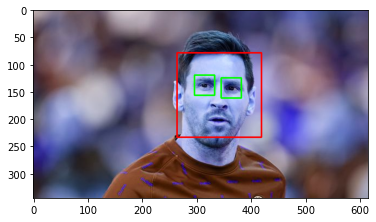

In [12]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

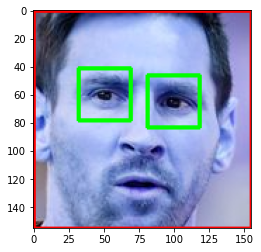

In [13]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

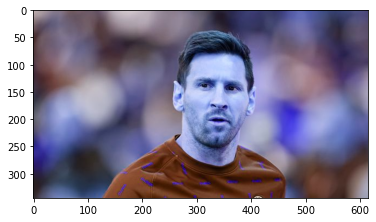

In [15]:
original_image = cv2.imread('./test_images/messitest1.jpg')
plt.imshow(original_image)

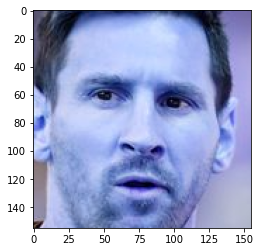

In [16]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/messitest1.jpg')
plt.imshow(cropped_image)

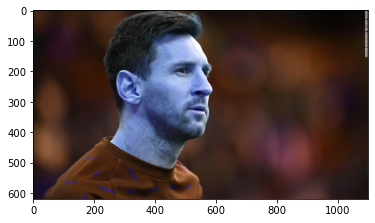

In [17]:
original_image = cv2.imread('./test_images/messitest2.jpg')
plt.imshow(original_image)

In [18]:
cropped_image_2 = get_cropped_image_if_2_eyes('./test_images/messitest2.jpg')
cropped_image_2

In [19]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/acropped/"

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/acropped',
 './dataset/cristiano_ronaldo',
 './dataset/kevin_debruyne',
 './dataset/kylian_mbappe',
 './dataset/lionel_messi',
 './dataset/mo_salah',
 './dataset/neymar',
 './dataset/robert_lewandowski']

In [21]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
cropped_image_dirs = []
players_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    img_count=1
    player_name = img_dir.split('/')[-1]
    print(player_name)

    players_file_names_dict[player_name] = []
    
    for entry in os.scandir(img_dir):
        print(entry.path)
        print(img_count)
        img_count+=1
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + player_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = player_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            players_file_names_dict[player_name].append(cropped_file_path)
            count += 1  
            
    

acropped
cristiano_ronaldo
./dataset/cristiano_ronaldo\20 Times Cristiano Ronaldo CARRIED.jpg
1
Generating cropped images in folder:  ./dataset/acropped/cristiano_ronaldo
./dataset/cristiano_ronaldo\Cristiano Ronaldo (_Cristiano)   Twitter.jpg
2
./dataset/cristiano_ronaldo\Cristiano Ronaldo - IMDb.jpg
3
./dataset/cristiano_ronaldo\Cristiano Ronaldo - Juventus.jpg
4
./dataset/cristiano_ronaldo\Cristiano Ronaldo - Stats 21 22.jpg
5
./dataset/cristiano_ronaldo\Cristiano Ronaldo - Wikipedia.jpg
6
./dataset/cristiano_ronaldo\Cristiano Ronaldo Admits He Was _Super.webp
7
./dataset/cristiano_ronaldo\Cristiano Ronaldo and Mason Greenwood.jpg
8
./dataset/cristiano_ronaldo\Cristiano Ronaldo and Paul Pogba ruled.jpg
9
./dataset/cristiano_ronaldo\Cristiano Ronaldo Apologizes After.jpg
10
./dataset/cristiano_ronaldo\Cristiano Ronaldo Becomes 1st Person To.jpeg
11
./dataset/cristiano_ronaldo\Cristiano Ronaldo breaks silence on.jpg
12
./dataset/cristiano_ronaldo\Cristiano Ronaldo building a luxury.jp

./dataset/kevin_debruyne\Kevin De Bruyne - Wikipedia.jpg
26
./dataset/kevin_debruyne\Kevin De Bruyne admits he will not be.jpg
27
./dataset/kevin_debruyne\Kevin De Bruyne beats Mohamed Salah.png
28
./dataset/kevin_debruyne\Kevin De Bruyne Biography_ Age_ Family.jpg
29
./dataset/kevin_debruyne\Kevin De Bruyne commits future to.jpg
30
./dataset/kevin_debruyne\Kevin De Bruyne hails _biggest legend.jpg
31
./dataset/kevin_debruyne\Kevin De Bruyne helps Manchester City.jpg
32
./dataset/kevin_debruyne\Kevin De Bruyne holds the key to.jpg
33
./dataset/kevin_debruyne\Kevin de bruyne Images_ Stock Photos.jpg
34
./dataset/kevin_debruyne\Kevin De Bruyne Insists Lack of.jpg
35
./dataset/kevin_debruyne\Kevin De Bruyne Is Manchester City_s.jpg
36
./dataset/kevin_debruyne\Kevin De Bruyne issues classy title.jpg
37
./dataset/kevin_debruyne\Kevin De Bruyne key to Pep Guardiola_s.jpg
38
./dataset/kevin_debruyne\Kevin De Bruyne Manchester City.jpg
39
./dataset/kevin_debruyne\Kevin De Bruyne Manchester Cit

./dataset/kylian_mbappe\Kylian Mbappe To Leave PSG For FREE.jpeg
51
./dataset/kylian_mbappe\Kylian Mbappe transfer_ Real Madrid set.jpg
52
./dataset/kylian_mbappe\Kylian Mbappe will not renew his.jpg
53
./dataset/kylian_mbappe\Kylian Mbappe will prevent Real Madrid.jpeg
54
./dataset/kylian_mbappe\Kylian Mbappe Will Stay At PSG And Make.jpg
55
./dataset/kylian_mbappe\Kylian Mbappe.jpg
56
./dataset/kylian_mbappe\Kylian Mbappe_ 12 fun facts about.jpg
57
./dataset/kylian_mbappe\Kylian Mbappe_ A personal decision _ Marca.jpg
58
./dataset/kylian_mbappe\Kylian Mbappe_ Biography_ Net worth.png
59
./dataset/kylian_mbappe\Kylian Mbappe_ Future Ballon d_Or.jpg
60
./dataset/kylian_mbappe\Kylian Mbappe_ LaLiga criticises (1).jpg
61
./dataset/kylian_mbappe\Kylian Mbappe_ LaLiga criticises.jpg
62
./dataset/kylian_mbappe\Kylian Mbappe_ PSG forward signs new.jpg
63
./dataset/kylian_mbappe\Kylian Mbappe_ Real Madrid consider.jpg
64
./dataset/kylian_mbappe\Kylian Mbappe_ Real Madrid make 160m.jpg
65
./da

./dataset/lionel_messi\Pedri on Messi Barcelona transfer return.jpg
82
./dataset/lionel_messi\PHOTOS_ Lionel Messi From Each Year of.jpg
83
./dataset/lionel_messi\PSG football club braces for Lionel.jpg
84
./dataset/lionel_messi\PSG players test positive for COVID-19.jpg
85
./dataset/lionel_messi\Report_ Lionel Messi to Inter Miami.jpg
86
./dataset/lionel_messi\Report_ PSG Superstar Lionel Messi.jpg
87
./dataset/lionel_messi\soccer star Leonel Messi helps.jpg
88
./dataset/lionel_messi\Soccer superstar Lionel Messi leaving.jpg
89
./dataset/lionel_messi\Transfer news - Where does Lionel Messi.jpg
90
./dataset/lionel_messi\Where will Lionel Messi be playing next.jpg
91
./dataset/lionel_messi\Why did Lionel Messi leave Barcelona.jpg
92
./dataset/lionel_messi\World Cup Playoffs_ Lionel Messi Leads.webp
93
mo_salah
./dataset/mo_salah\2018 World Cup_ Mo Salah_s popularity.jpg
1
./dataset/mo_salah\290 Unique Mo Salah ideas _ mo salah.jpg
2
Generating cropped images in folder:  ./dataset/acropp

./dataset/neymar\Neymar da Silva Santos Jr_ Football.jpg
33
./dataset/neymar\Neymar dedicates PSG goals to Brazilian.jpg
34
./dataset/neymar\Neymar didn_t sign for Real Madrid.jpg
35
./dataset/neymar\Neymar fires back at reporter with.jpg
36
./dataset/neymar\Neymar flirting with Barcelona return.jpg
37
./dataset/neymar\Neymar Hints at Future Move to MLS.jpg
38
./dataset/neymar\Neymar joins Cristiano Ronaldo_ Romario.jpg
39
./dataset/neymar\Neymar Jr (_neymarjr)   Twitter (1).jpg
40
./dataset/neymar\Neymar Jr (_neymarjr)   Twitter.jpg
41
./dataset/neymar\Neymar Jr 2022 - Neymagic Skills_ Goals.jpg
42
./dataset/neymar\Neymar Jr is a corporate tool driven by.jpg
43
./dataset/neymar\Neymar Jr Profile _ PlanetSport.jpg
44
./dataset/neymar\Neymar Jr _ Definitive Player Guide _ The18.jpg
45
./dataset/neymar\Neymar Jr _ Paris Saint-Germain.png
46
./dataset/neymar\Neymar Jr. - Latest News_ Stats and.jpg
47
./dataset/neymar\Neymar Jr. Biography_ Achievements.jpg
48
./dataset/neymar\Neymar Jr_ _A

./dataset/robert_lewandowski\Robert Lewandowski is FC Bayern_s.jpg
61
./dataset/robert_lewandowski\Robert Lewandowski is Just Two Goals.webp
62
./dataset/robert_lewandowski\Robert Lewandowski Not to Extend.webp
63
./dataset/robert_lewandowski\Robert Lewandowski offered to Barcelona.jpeg
64
./dataset/robert_lewandowski\Robert Lewandowski on track to shatter.webp
65
./dataset/robert_lewandowski\Robert Lewandowski open to staying at.jpeg
66
./dataset/robert_lewandowski\Robert Lewandowski pursuit.jpg
67
./dataset/robert_lewandowski\Robert Lewandowski rejects Bayern.jpg
68
./dataset/robert_lewandowski\Robert Lewandowski Ruled Out For 4.webp
69
./dataset/robert_lewandowski\Robert Lewandowski score the most goals.jpg
70
./dataset/robert_lewandowski\Robert Lewandowski scores disputed.webp
71
./dataset/robert_lewandowski\Robert Lewandowski sets Bundesliga away.jpg
72
./dataset/robert_lewandowski\Robert Lewandowski signing.jpg
73
./dataset/robert_lewandowski\Robert Lewandowski tells Bayern Munic

## Applying wavelet transform

In [23]:
import numpy as np
##import scipy
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

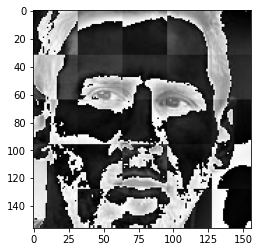

In [24]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [25]:
player_file_names_dict = {}
for img_dir in cropped_image_dirs:
    player_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    player_file_names_dict[player_name] = file_list
player_file_names_dict

{'cristiano_ronaldo': ['./dataset/acropped/cristiano_ronaldo\\cristiano_ronaldo1.png',
  './dataset/acropped/cristiano_ronaldo\\cristiano_ronaldo10.png',
  './dataset/acropped/cristiano_ronaldo\\cristiano_ronaldo11.png',
  './dataset/acropped/cristiano_ronaldo\\cristiano_ronaldo12.png',
  './dataset/acropped/cristiano_ronaldo\\cristiano_ronaldo13.png',
  './dataset/acropped/cristiano_ronaldo\\cristiano_ronaldo14.png',
  './dataset/acropped/cristiano_ronaldo\\cristiano_ronaldo15.png',
  './dataset/acropped/cristiano_ronaldo\\cristiano_ronaldo16.png',
  './dataset/acropped/cristiano_ronaldo\\cristiano_ronaldo17.png',
  './dataset/acropped/cristiano_ronaldo\\cristiano_ronaldo18.png',
  './dataset/acropped/cristiano_ronaldo\\cristiano_ronaldo19.png',
  './dataset/acropped/cristiano_ronaldo\\cristiano_ronaldo2.png',
  './dataset/acropped/cristiano_ronaldo\\cristiano_ronaldo20.png',
  './dataset/acropped/cristiano_ronaldo\\cristiano_ronaldo21.png',
  './dataset/acropped/cristiano_ronaldo\\cr

In [26]:
class_dict = {}
count = 0
for player_name in player_file_names_dict.keys():
    class_dict[player_name] = count
    count+=1
class_dict

{'cristiano_ronaldo': 0,
 'kevin_debruyne': 1,
 'kylian_mbappe': 2,
 'lionel_messi': 3,
 'mo_salah': 4,
 'neymar': 5,
 'robert_lewandowski': 6}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [27]:
X = []
y = []

for player_name, training_files in player_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[player_name])  

In [28]:
len(X)

297

In [29]:
len(X[0]) #32*32*3 (rgb img) + 32*32 (wavelet transform img = 4096)

4096

In [30]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(297, 4096)

In [31]:
len(y)

297

## Model training

### Now that data cleaning is done and X,y sets are created, it is time to do data modeling

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

### Dividing dataset into training and test set

In [33]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [34]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6833333333333333

In [35]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.75      0.75      0.75         8
           2       0.40      0.86      0.55         7
           3       0.67      0.67      0.67         6
           4       1.00      1.00      1.00         5
           5       0.86      0.50      0.63        12
           6       0.91      0.71      0.80        14

    accuracy                           0.68        60
   macro avg       0.73      0.71      0.70        60
weighted avg       0.75      0.68      0.69        60



## Using GridSearchCV to find model with best accuracy

In [36]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [37]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [38]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.759309,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.384397,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.763918,{'logisticregression__C': 1}


In [39]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [40]:
best_estimators['svm'].score(X_test,y_test)

0.7833333333333333

In [41]:
best_estimators['random_forest'].score(X_test,y_test)

0.43333333333333335

In [42]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7166666666666667

In [43]:
best_clf = best_estimators['svm']

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 5,  0,  0,  1,  0,  1,  1],
       [ 1,  5,  1,  1,  0,  0,  0],
       [ 0,  1,  6,  0,  0,  0,  0],
       [ 0,  0,  1,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0],
       [ 1,  0,  1,  1,  0,  9,  0],
       [ 0,  2,  0,  0,  0,  0, 12]], dtype=int64)

Text(69.0, 0.5, 'Truth')

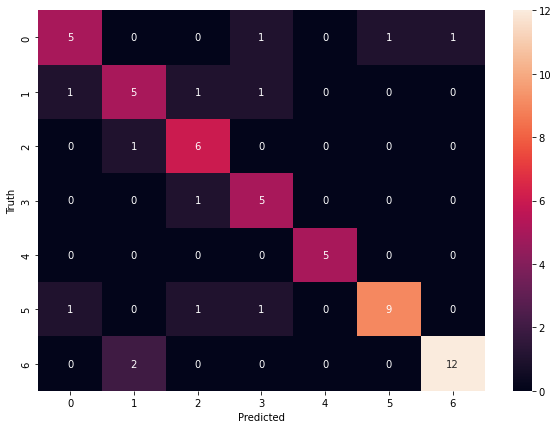

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
class_dict

{'cristiano_ronaldo': 0,
 'kevin_debruyne': 1,
 'kylian_mbappe': 2,
 'lionel_messi': 3,
 'mo_salah': 4,
 'neymar': 5,
 'robert_lewandowski': 6}

## Save the trained model

In [47]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

## Save the class dictionary

In [48]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))